# TDI onboarding day 4 and 5

## Day 4

Import libraries

In [3]:
from pathlib import Path
import pandas as pd

Load the csv file

In [4]:
cwd = Path.cwd() # current working directory
file = cwd / 'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv'

df = pd.read_csv(file)

Get descriptive statistics of df

In [6]:
df.describe()

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,450.000000,446.000000,11.000000,14.000000,4.500000e+02,4.500000e+02,409.000000,409.000000,409.000000,409.000000,409.000000,4.010000e+02,4.010000e+02
mean,11024.124444,124.186099,13.545455,297.500000,3.943778e+04,4.234601e+05,40.722293,-73.942376,317.982885,27.823961,2049.080685,3.295894e+06,3.163398e+09
std,405.126704,392.750810,16.409532,778.404655,1.345949e+05,1.936066e+06,0.057503,0.065553,93.925749,10.984316,7784.674799,9.897776e+05,9.483943e+08
min,10001.000000,0.000000,2.000000,4.000000,-1.099101e+05,0.000000e+00,40.555080,-74.216206,101.000000,1.000000,1.000000,1.000811e+06,1.000220e+09
25%,11101.000000,11.000000,4.000000,15.500000,1.770947e+03,1.498420e+04,40.676351,-73.984843,301.000000,26.000000,20.000000,3.009889e+06,3.006320e+09
50%,11205.000000,28.000000,10.000000,42.000000,6.101215e+03,5.431184e+04,40.721144,-73.941706,307.000000,30.000000,199.000000,3.336903e+06,3.036760e+09
75%,11232.000000,76.000000,13.500000,160.750000,2.025603e+04,2.003667e+05,40.752096,-73.909345,402.000000,36.000000,543.000000,4.005076e+06,4.003930e+09
max,11693.000000,3878.000000,60.000000,2964.000000,1.568982e+06,3.351826e+07,40.890837,-73.743730,503.000000,51.000000,94201.000000,5.168823e+06,5.070670e+09


Get all columns in df

In [7]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

1. How many different companies are represented in the data set?

In [8]:
number_of_companies = df['Company Name'].unique()
print('%d companies are represented in the data set.' % number_of_companies.size)

439 companies are represented in the data set.


2. What is the total number of jobs created for businesses in Queens?

In [9]:
total_number_of_jobs_created_Queens = df['Job created'][(df['Borough'].isin(['Queens']))].sum()
print('A total of %d jobs are created for businesses in Queens.' % total_number_of_jobs_created_Queens)

A total of 102 jobs are created for businesses in Queens.


3. How many unique email domain names are there in the data set?

In [10]:
new = df['company email'].str.split("@", n = 1, expand = True) # max number of split is 1 and create new column for anything after the split
domain_names = new[1] # domain names only
print('There are %d unique email domain names in the data set.' % domain_names.unique().size)

There are 358 unique email domain names in the data set.


4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and total jobs created for each NTA?

In [11]:
list_of_NTAs = df.groupby(['NTA'])['Company Name'].count()
list_of_NTAs = list_of_NTAs[list_of_NTAs >= 5].reset_index()
list_of_NTAs = list(list_of_NTAs['NTA'])

df2 = df[['NTA', 'Company Name','Total Savings', 'Job created']].where(df['NTA'].isin(list_of_NTAs)).groupby(['NTA']).mean('Total Savings', 'Job created')
df2 = df2.reset_index()
print(df2)

                                                 NTA  Total Savings  \
0                  Battery Park City-Lower Manhattan  469890.796667   
1                                     Bushwick South   26140.455000   
2           Carroll Gardens-Columbia Street-Red Hook   24337.390000   
3                                      College Point   17159.372857   
4                                Crown Heights North    4036.298889   
5   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   59950.340000   
6                                      East New York   48433.093333   
7                                  East Williamsburg   13990.626364   
8                                         Greenpoint    9753.649286   
9               Hunters Point-Sunnyside-West Maspeth   23931.398933   
10                                       Hunts Point   39246.016154   
11                                    Manhattanville    2760.888889   
12                                           Maspeth    6658.283333   
13    

5. Save your result for the previous question as a CSV file.

In [12]:
filename = cwd / 'avg_total_savings_and_total_jobs_created_NTA_over_5.csv'
avg_total_savings_and_total_jobs_created_NTA_over_5 = df2.to_csv(filename)

## Day 5

Import libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import datetime

scatter plot of jobs created versus average savings

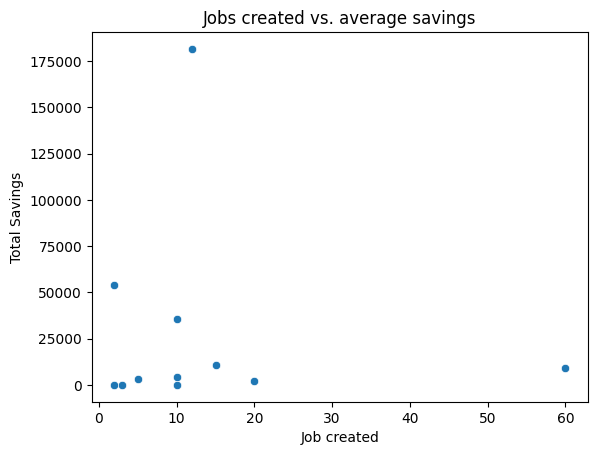

In [16]:
plot_data = df[['Job created', 'Total Savings']]
sns.scatterplot(data=plot_data, x='Job created', y='Total Savings')
plt.title('Jobs created vs. average savings')
filename = cwd / 'scatter_plot_jobs_created_vs_avg_savings.png'
plt.savefig(filename)
plt.show()

histogram of the log of the average total savings

/Users/Vanessa/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Vanessa/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


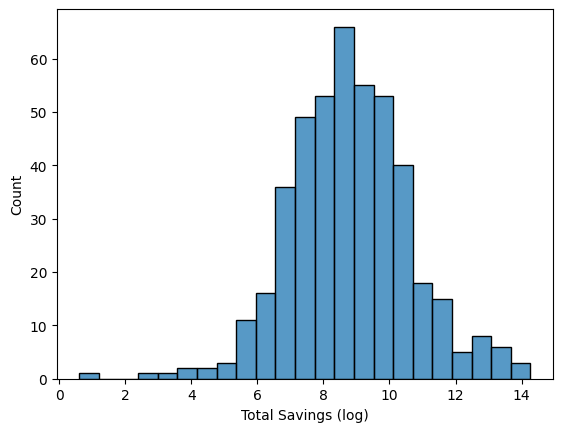

In [17]:
plot_data = np.log(df['Total Savings'])
sns.histplot(data=plot_data)
plt.xlabel('Total Savings (log)')
filename = cwd / 'histogram_log_of_avg_total_savings.png'
plt.savefig(filename)
plt.show()

line plot of total jobs created for each month

/var/folders/bk/tlvz0qpx4b1879kg8ccs5p1c0000gn/T/ipykernel_47618/85230398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Effective Date'] = pd.to_datetime(df2['Effective Date'], format='%m/%d/%Y')
/var/folders/bk/tlvz0qpx4b1879kg8ccs5p1c0000gn/T/ipykernel_47618/85230398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year_Month'] = df2['Effective Date'].dt.to_period('M')
/var/folders/bk/tlvz0qpx4b1879kg8ccs5p1c0000gn/T/ipykernel_47618/85230398.py:4: FutureWarning: The default value of num

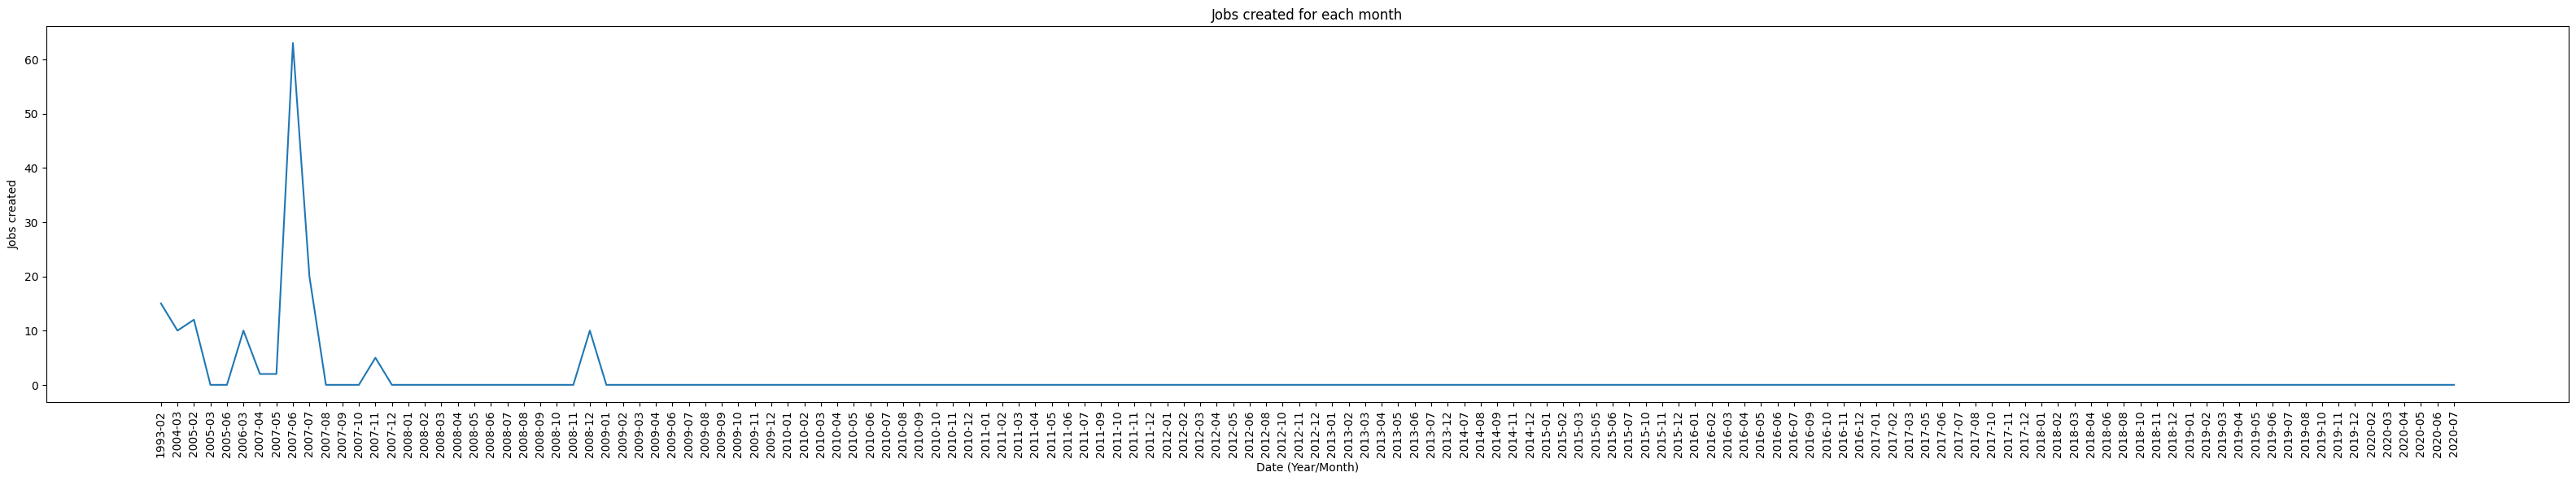

In [18]:
df2 = df[['Effective Date', 'Job created']]
df2['Effective Date'] = pd.to_datetime(df2['Effective Date'], format='%m/%d/%Y')
df2['Year_Month'] = df2['Effective Date'].dt.to_period('M')
plot_data = df2.groupby(df2['Year_Month']).sum().reset_index()
plot_data['Year_Month'] = plot_data['Year_Month'].dt.strftime('%Y-%m')
# print(plot_data)
# print(plot_data.dtype)
fig, ax = plt.subplots(figsize=(40, 6), dpi=100)
sns.lineplot(data=plot_data, x='Year_Month', y='Job created')
x_dates = plot_data['Year_Month'].sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation='vertical')
plt.xlabel('Date (Year/Month)')
plt.ylabel('Jobs created')
plt.title('Jobs created for each month')
filename = cwd / 'line_plot_of_total_jobs_created_for_each_month.png'
plt.savefig(filename)
plt.show()